<a href="https://colab.research.google.com/github/beverast/Notebooks/blob/master/Working_with_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Time Series
A notebook from working through the Python Data Science Handbook:

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

* Time stamps: particular moments in time
* Time intervals: lengths of time between particular beginning and end points
* Periods: time intervals of uniform length and non-overlapping
* Time deltas: exact lengths of time

### Native Python Dates and Times

In [0]:
from datetime import datetime


datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [0]:
from dateutil import parser


date = parser.parse('4th of July, 2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

In [0]:
# strftime string formatter %A meaning: Weekday as locale's full name
date.strftime('%A')

'Saturday'

### Typed arrays of times: Numpy's datetime64

In [0]:
import numpy as np


# Numpy encodes dates as 64-bit integersto allow
# arrays of dates to be compactly represented
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [0]:
# Perform vectorized operations
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [0]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [0]:
# datetime64 also has format codes: http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

### Dates and times in pandas

In [0]:
import pandas as pd


date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [0]:
date.strftime('%A')

'Saturday'

In [0]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [0]:
# Series objects have time indexed data
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                         '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [0]:
# A Series indexing pattern
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [0]:
# Get all data from a given date (data-as-index)
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures

* pandas.Timestamp: a replacement for datetime but efficient like numpy.datetime64
* pandas.Period: encodes a fixed-frequency interval, and the assoc. index structure is pandas.PeriodIndex
* pandas.Timedelta: a more efficient datetime.timedelta, and the assoc. index structure is TimedeltaIndex

In [0]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6',
                       '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [0]:
# DatetimeIndex can be converted to PeriodIndex
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [0]:
# TimedeltaIndex can be created when a date is subtracted from another
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: pd.date_range()

In [0]:
# A sequence of days from 07-03 to 07-10
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [0]:
# A sequence of 8 hours on 2015-07-03
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [0]:
# A sequence of 8 months starting from 2015-07
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [0]:
# A sequence of 10 hours starting from 00:00:00
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

In [0]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [0]:
# Create a business day offset
from pandas.tseries.offsets import BDay


pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Resampling, Shifting, and Windowing

In [0]:
from pandas_datareader import data


# Google Finance API has been deprecated
goog = data.DataReader('GOOG', 'yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,312.721039,310.103088,311.449310,311.349976,3937800.0,311.349976
2010-01-05,311.891449,308.761810,311.563568,309.978882,6048500.0,309.978882
2010-01-06,310.907837,301.220856,310.907837,302.164703,8009000.0,302.164703
2010-01-07,303.029083,294.410156,302.731018,295.130463,12912000.0,295.130463
2010-01-08,299.675903,292.651581,294.087250,299.064880,9509900.0,299.064880


In [0]:
goog = goog['Close']

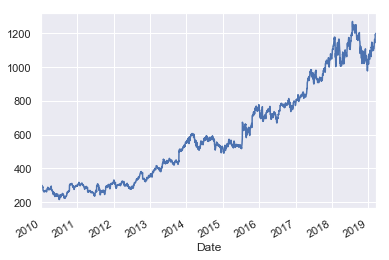

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()


goog.plot();

### Resampling and converting frequencies

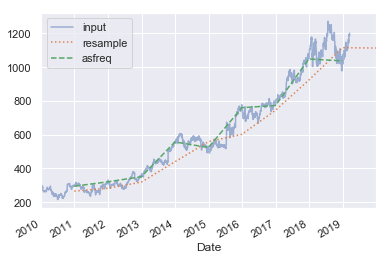

In [0]:
# resample() is data aggregation and asfreq() is data selection
# resample reports the average of the previous year
# asfreq reports the value at the end of the year
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

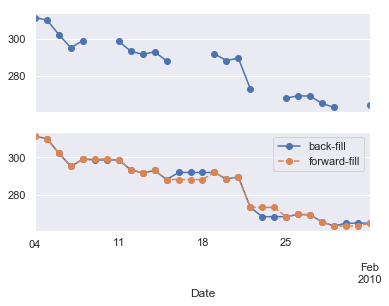

In [0]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:20]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill']);

### Time-shifts

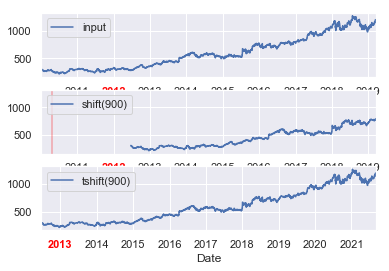

In [0]:
# shift() shifts the data, tshift() shifts the index
fig, ax = plt.subplots(3, sharey=True)

# Apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

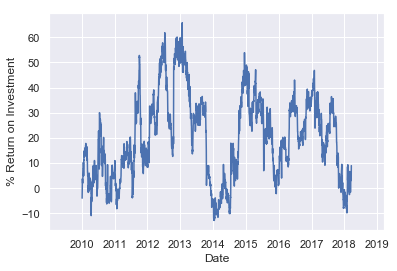

In [0]:
# Use shifted values to compute the one-year return on investment
# over the course of the dataset.
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling windows

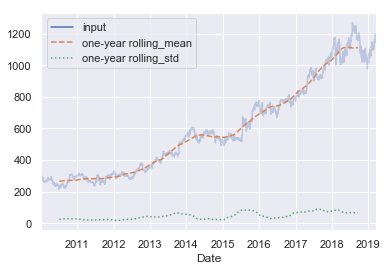

In [0]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)